# This notebook look at the rate of change of gradient penalty with different lambda_gp

We test with two scenario <br>
1) lambda_gp = 0 <br>
2) lambda_gp = 1000 <br>
We print 
* gradient penalty <br>
* contrastive loss( we call it loss) <br>
* and final_loss (loss + lambda_gp * gp) <br>
for every single epoch and make a comparison between two cases, we look at three values

In [ ]:
import argparse
import os
import subprocess

import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
from torchlars import LARS
from tqdm import tqdm

from configs import get_datasets
from critic import LinearCritic
from evaluate import save_checkpoint,save_checkpoint2, encode_train_set, train_clf, test
from models import *
from scheduler import CosineAnnealingWithLinearRampLR
from augmentation import ManualNormalise, DifferentiableColourDistortionByTorch_manual, gen_lambda
from torchvision import transforms

import torch.autograd as autograd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [3]:
%run simclr_clraug.py --arch resnet18 --filename resnet18_aam_new_gp1000_0_n1.pth  --num-epochs 1000 --test-freq 50 --cosine-anneal --norm 1 --lambda-gp 1000

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0


gp: 0.01124 ,  loss: 6.768,  final_loss: 18.010: ██████████| 98/98 [01:36<00:00,  1.01it/s]


Epoch: 1



gp: 0.00843 ,  loss: 6.523,  final_loss: 14.954: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 2



gp: 0.00698 ,  loss: 6.380,  final_loss: 13.360: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 3



gp: 0.00593 ,  loss: 6.266,  final_loss: 12.198: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 4



gp: 0.00514 ,  loss: 6.174,  final_loss: 11.319: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 5



gp: 0.00443 ,  loss: 6.098,  final_loss: 10.531: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 6



gp: 0.00404 ,  loss: 6.049,  final_loss: 10.090: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 7



gp: 0.00367 ,  loss: 5.998,  final_loss: 9.668: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 8



gp: 0.00346 ,  loss: 5.968,  final_loss: 9.425: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 9



gp: 0.00318 ,  loss: 5.927,  final_loss: 9.106: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 10



gp: 0.00297 ,  loss: 5.888,  final_loss: 8.856: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 11



gp: 0.00276 ,  loss: 5.843,  final_loss: 8.603: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 12



gp: 0.00259 ,  loss: 5.813,  final_loss: 8.407: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 13



gp: 0.00244 ,  loss: 5.782,  final_loss: 8.226: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 14



gp: 0.00237 ,  loss: 5.761,  final_loss: 8.127: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 15



gp: 0.00222 ,  loss: 5.740,  final_loss: 7.964: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 16



gp: 0.00223 ,  loss: 5.720,  final_loss: 7.945: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 17



gp: 0.00216 ,  loss: 5.706,  final_loss: 7.867: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 18



gp: 0.00215 ,  loss: 5.695,  final_loss: 7.845: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 19



gp: 0.00210 ,  loss: 5.684,  final_loss: 7.787: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 20



gp: 0.00206 ,  loss: 5.668,  final_loss: 7.728: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 21



gp: 0.00199 ,  loss: 5.658,  final_loss: 7.644: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 22



gp: 0.00202 ,  loss: 5.652,  final_loss: 7.669: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 23



gp: 0.00195 ,  loss: 5.641,  final_loss: 7.592: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 24



gp: 0.00194 ,  loss: 5.630,  final_loss: 7.568: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 25



gp: 0.00191 ,  loss: 5.629,  final_loss: 7.543: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 26



gp: 0.00188 ,  loss: 5.619,  final_loss: 7.501: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 27



gp: 0.00184 ,  loss: 5.613,  final_loss: 7.457: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 28



gp: 0.00183 ,  loss: 5.609,  final_loss: 7.440: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 29



gp: 0.00183 ,  loss: 5.603,  final_loss: 7.434: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 30



gp: 0.00179 ,  loss: 5.596,  final_loss: 7.385: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 31



gp: 0.00178 ,  loss: 5.589,  final_loss: 7.369: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 32



gp: 0.00179 ,  loss: 5.587,  final_loss: 7.374: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 33



gp: 0.00176 ,  loss: 5.579,  final_loss: 7.338: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 34



gp: 0.00173 ,  loss: 5.578,  final_loss: 7.307: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 35



gp: 0.00170 ,  loss: 5.572,  final_loss: 7.269: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 36



gp: 0.00171 ,  loss: 5.572,  final_loss: 7.286: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 37



gp: 0.00173 ,  loss: 5.565,  final_loss: 7.296: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 38



gp: 0.00169 ,  loss: 5.558,  final_loss: 7.244: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 39



gp: 0.00170 ,  loss: 5.561,  final_loss: 7.263: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 40



gp: 0.00167 ,  loss: 5.553,  final_loss: 7.225: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 41



gp: 0.00166 ,  loss: 5.548,  final_loss: 7.212: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 42



gp: 0.00167 ,  loss: 5.550,  final_loss: 7.222: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 43



gp: 0.00164 ,  loss: 5.547,  final_loss: 7.189: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 44



gp: 0.00166 ,  loss: 5.544,  final_loss: 7.203: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 45



gp: 0.00166 ,  loss: 5.540,  final_loss: 7.196: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 46



gp: 0.00163 ,  loss: 5.534,  final_loss: 7.162: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 47



gp: 0.00163 ,  loss: 5.534,  final_loss: 7.167: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 48



gp: 0.00159 ,  loss: 5.530,  final_loss: 7.118: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 49



gp: 0.00161 ,  loss: 5.532,  final_loss: 7.140: ██████████| 98/98 [01:33<00:00,  1.05it/s]
Encoded 49/50: ██████████| 50/50 [00:09<00:00,  5.53it/s]
Loss: 0.929 | Train Acc: 66.808% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.620 | Train Acc: 78.110% : ██████████| 500/500 [00:48<00:00, 10.21it/s] 
Loss: 0.716 | Test Acc: 75.030% : ██████████| 10/10 [00:01<00:00,  5.76it/s]


Saving..

Epoch: 50


gp: 0.00161 ,  loss: 5.527,  final_loss: 7.137: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 51



gp: 0.00159 ,  loss: 5.529,  final_loss: 7.121: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 52



gp: 0.00157 ,  loss: 5.520,  final_loss: 7.091: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 53



gp: 0.00161 ,  loss: 5.525,  final_loss: 7.133: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 54



gp: 0.00158 ,  loss: 5.519,  final_loss: 7.102: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 55



gp: 0.00161 ,  loss: 5.518,  final_loss: 7.125: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 56



gp: 0.00158 ,  loss: 5.516,  final_loss: 7.095: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 57



gp: 0.00159 ,  loss: 5.513,  final_loss: 7.099: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 58



gp: 0.00155 ,  loss: 5.508,  final_loss: 7.059: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 59



gp: 0.00156 ,  loss: 5.509,  final_loss: 7.070: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 60



gp: 0.00155 ,  loss: 5.507,  final_loss: 7.054: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 61



gp: 0.00155 ,  loss: 5.504,  final_loss: 7.051: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 62



gp: 0.00158 ,  loss: 5.507,  final_loss: 7.091: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 63



gp: 0.00154 ,  loss: 5.505,  final_loss: 7.046: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 64



gp: 0.00155 ,  loss: 5.501,  final_loss: 7.051: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 65



gp: 0.00158 ,  loss: 5.503,  final_loss: 7.084: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 66



gp: 0.00156 ,  loss: 5.501,  final_loss: 7.058: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 67



gp: 0.00157 ,  loss: 5.501,  final_loss: 7.072: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 68



gp: 0.00152 ,  loss: 5.495,  final_loss: 7.020: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 69



gp: 0.00155 ,  loss: 5.497,  final_loss: 7.049: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 70



gp: 0.00153 ,  loss: 5.492,  final_loss: 7.023: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 71



gp: 0.00156 ,  loss: 5.493,  final_loss: 7.050: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 72



gp: 0.00151 ,  loss: 5.488,  final_loss: 6.999: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 73



gp: 0.00154 ,  loss: 5.488,  final_loss: 7.028: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 74



gp: 0.00155 ,  loss: 5.485,  final_loss: 7.039: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 75



gp: 0.00153 ,  loss: 5.486,  final_loss: 7.018: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 76



gp: 0.00152 ,  loss: 5.483,  final_loss: 7.007: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 77



gp: 0.00151 ,  loss: 5.484,  final_loss: 6.993: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 78



gp: 0.00152 ,  loss: 5.481,  final_loss: 6.999: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 79



gp: 0.00151 ,  loss: 5.480,  final_loss: 6.986: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 80



gp: 0.00153 ,  loss: 5.478,  final_loss: 7.009: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 81



gp: 0.00150 ,  loss: 5.479,  final_loss: 6.982: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 82



gp: 0.00152 ,  loss: 5.476,  final_loss: 6.994: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 83



gp: 0.00152 ,  loss: 5.477,  final_loss: 6.999: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 84



gp: 0.00150 ,  loss: 5.475,  final_loss: 6.978: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 85



gp: 0.00150 ,  loss: 5.474,  final_loss: 6.975: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 86



gp: 0.00149 ,  loss: 5.475,  final_loss: 6.963: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 87



gp: 0.00152 ,  loss: 5.472,  final_loss: 6.993: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 88



gp: 0.00148 ,  loss: 5.470,  final_loss: 6.950: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 89



gp: 0.00150 ,  loss: 5.473,  final_loss: 6.976: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 90



gp: 0.00147 ,  loss: 5.467,  final_loss: 6.940: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 91



gp: 0.00149 ,  loss: 5.466,  final_loss: 6.957: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 92



gp: 0.00151 ,  loss: 5.467,  final_loss: 6.973: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 93



gp: 0.00152 ,  loss: 5.466,  final_loss: 6.988: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 94



gp: 0.00149 ,  loss: 5.466,  final_loss: 6.959: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 95



gp: 0.00152 ,  loss: 5.463,  final_loss: 6.980: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 96



gp: 0.00150 ,  loss: 5.465,  final_loss: 6.964: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 97



gp: 0.00150 ,  loss: 5.464,  final_loss: 6.960: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 98



gp: 0.00148 ,  loss: 5.463,  final_loss: 6.943: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 99



gp: 0.00148 ,  loss: 5.459,  final_loss: 6.941: ██████████| 98/98 [01:33<00:00,  1.04it/s]
Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.70it/s]
Loss: 0.785 | Train Acc: 71.608% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.492 | Train Acc: 82.792% : ██████████| 500/500 [00:49<00:00, 10.13it/s] 
Loss: 0.605 | Test Acc: 79.220% : ██████████| 10/10 [00:01<00:00,  5.82it/s]

Saving..

Epoch: 100



gp: 0.00149 ,  loss: 5.455,  final_loss: 6.941: █         | 10/98 [00:10<01:31,  1.04s/it]


KeyboardInterrupt: 

In [4]:
%run simclr_clraug.py --arch resnet18 --filename resnet18_aam_new_gp0_0_n1.pth  --num-epochs 1000 --test-freq 50 --cosine-anneal --norm 1 --lambda-gp 0

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0


gp: 0.01166 ,  loss: 6.811,  final_loss: 6.811: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 1



gp: 0.00857 ,  loss: 6.537,  final_loss: 6.537: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 2



gp: 0.00702 ,  loss: 6.380,  final_loss: 6.380: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 3



gp: 0.00603 ,  loss: 6.263,  final_loss: 6.263: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 4



gp: 0.00513 ,  loss: 6.169,  final_loss: 6.169: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 5



gp: 0.00452 ,  loss: 6.092,  final_loss: 6.092: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 6



gp: 0.00404 ,  loss: 6.047,  final_loss: 6.047: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 7



gp: 0.00371 ,  loss: 6.008,  final_loss: 6.008: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 8



gp: 0.00350 ,  loss: 5.966,  final_loss: 5.966: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 9



gp: 0.00327 ,  loss: 5.935,  final_loss: 5.935: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 10



gp: 0.00304 ,  loss: 5.890,  final_loss: 5.890: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 11



gp: 0.00281 ,  loss: 5.852,  final_loss: 5.852: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 12



gp: 0.00260 ,  loss: 5.813,  final_loss: 5.813: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 13



gp: 0.00250 ,  loss: 5.792,  final_loss: 5.792: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 14



gp: 0.00237 ,  loss: 5.767,  final_loss: 5.767: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 15



gp: 0.00230 ,  loss: 5.745,  final_loss: 5.745: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 16



gp: 0.00221 ,  loss: 5.727,  final_loss: 5.727: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 17



gp: 0.00219 ,  loss: 5.709,  final_loss: 5.709: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 18



gp: 0.00213 ,  loss: 5.696,  final_loss: 5.696: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 19



gp: 0.00208 ,  loss: 5.682,  final_loss: 5.682: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 20



gp: 0.00204 ,  loss: 5.671,  final_loss: 5.671: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 21



gp: 0.00205 ,  loss: 5.662,  final_loss: 5.662: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 22



gp: 0.00200 ,  loss: 5.649,  final_loss: 5.649: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 23



gp: 0.00199 ,  loss: 5.642,  final_loss: 5.642: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 24



gp: 0.00192 ,  loss: 5.632,  final_loss: 5.632: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 25



gp: 0.00194 ,  loss: 5.629,  final_loss: 5.629: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 26



gp: 0.00190 ,  loss: 5.622,  final_loss: 5.622: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 27



gp: 0.00188 ,  loss: 5.613,  final_loss: 5.613: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 28



gp: 0.00183 ,  loss: 5.607,  final_loss: 5.607: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 29



gp: 0.00183 ,  loss: 5.599,  final_loss: 5.599: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 30



gp: 0.00178 ,  loss: 5.593,  final_loss: 5.593: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 31



gp: 0.00178 ,  loss: 5.591,  final_loss: 5.591: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 32



gp: 0.00179 ,  loss: 5.586,  final_loss: 5.586: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 33



gp: 0.00173 ,  loss: 5.578,  final_loss: 5.578: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 34



gp: 0.00173 ,  loss: 5.573,  final_loss: 5.573: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 35



gp: 0.00175 ,  loss: 5.577,  final_loss: 5.577: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 36



gp: 0.00172 ,  loss: 5.564,  final_loss: 5.564: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 37



gp: 0.00171 ,  loss: 5.567,  final_loss: 5.567: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 38



gp: 0.00170 ,  loss: 5.560,  final_loss: 5.560: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 39



gp: 0.00171 ,  loss: 5.557,  final_loss: 5.557: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 40



gp: 0.00167 ,  loss: 5.558,  final_loss: 5.558: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 41



gp: 0.00168 ,  loss: 5.551,  final_loss: 5.551: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 42



gp: 0.00166 ,  loss: 5.545,  final_loss: 5.545: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 43



gp: 0.00166 ,  loss: 5.545,  final_loss: 5.545: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 44



gp: 0.00164 ,  loss: 5.541,  final_loss: 5.541: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 45



gp: 0.00160 ,  loss: 5.539,  final_loss: 5.539: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 46



gp: 0.00161 ,  loss: 5.533,  final_loss: 5.533: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 47



gp: 0.00162 ,  loss: 5.533,  final_loss: 5.533: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 48



gp: 0.00165 ,  loss: 5.535,  final_loss: 5.535: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 49



gp: 0.00161 ,  loss: 5.528,  final_loss: 5.528: ██████████| 98/98 [01:33<00:00,  1.04it/s]
Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.76it/s]
Loss: 0.905 | Train Acc: 67.546% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.611 | Train Acc: 78.750% : ██████████| 500/500 [01:07<00:00,  7.40it/s] 
Loss: 0.698 | Test Acc: 75.710% : ██████████| 10/10 [00:01<00:00,  5.60it/s]


Saving..

Epoch: 50


gp: 0.00161 ,  loss: 5.529,  final_loss: 5.529: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 51



gp: 0.00162 ,  loss: 5.524,  final_loss: 5.524: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 52



gp: 0.00162 ,  loss: 5.521,  final_loss: 5.521: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 53



gp: 0.00160 ,  loss: 5.520,  final_loss: 5.520: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 54



gp: 0.00162 ,  loss: 5.521,  final_loss: 5.521: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 55



gp: 0.00160 ,  loss: 5.515,  final_loss: 5.515: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 56



gp: 0.00157 ,  loss: 5.515,  final_loss: 5.515: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 57



gp: 0.00156 ,  loss: 5.513,  final_loss: 5.513: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 58



gp: 0.00158 ,  loss: 5.510,  final_loss: 5.510: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 59



gp: 0.00158 ,  loss: 5.514,  final_loss: 5.514: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 60



gp: 0.00160 ,  loss: 5.510,  final_loss: 5.510: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 61



gp: 0.00157 ,  loss: 5.508,  final_loss: 5.508: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 62



gp: 0.00156 ,  loss: 5.507,  final_loss: 5.507: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 63



gp: 0.00156 ,  loss: 5.502,  final_loss: 5.502: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 64



gp: 0.00154 ,  loss: 5.498,  final_loss: 5.498: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 65



gp: 0.00153 ,  loss: 5.497,  final_loss: 5.497: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 66



gp: 0.00155 ,  loss: 5.500,  final_loss: 5.500: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 67



gp: 0.00158 ,  loss: 5.498,  final_loss: 5.498: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 68



gp: 0.00152 ,  loss: 5.493,  final_loss: 5.493: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 69



gp: 0.00158 ,  loss: 5.496,  final_loss: 5.496: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 70



gp: 0.00153 ,  loss: 5.491,  final_loss: 5.491: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 71



gp: 0.00153 ,  loss: 5.489,  final_loss: 5.489: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 72



gp: 0.00154 ,  loss: 5.489,  final_loss: 5.489: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 73



gp: 0.00156 ,  loss: 5.488,  final_loss: 5.488: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 74



gp: 0.00154 ,  loss: 5.486,  final_loss: 5.486: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 75



gp: 0.00154 ,  loss: 5.486,  final_loss: 5.486: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 76



gp: 0.00155 ,  loss: 5.485,  final_loss: 5.485: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 77



gp: 0.00152 ,  loss: 5.483,  final_loss: 5.483: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 78



gp: 0.00153 ,  loss: 5.480,  final_loss: 5.480: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 79



gp: 0.00153 ,  loss: 5.481,  final_loss: 5.481: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 80



gp: 0.00151 ,  loss: 5.479,  final_loss: 5.479: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 81



gp: 0.00151 ,  loss: 5.477,  final_loss: 5.477: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 82



gp: 0.00150 ,  loss: 5.479,  final_loss: 5.479: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 83



gp: 0.00156 ,  loss: 5.478,  final_loss: 5.478: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 84



gp: 0.00150 ,  loss: 5.474,  final_loss: 5.474: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 85



gp: 0.00150 ,  loss: 5.471,  final_loss: 5.471: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 86



gp: 0.00152 ,  loss: 5.474,  final_loss: 5.474: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 87



gp: 0.00152 ,  loss: 5.471,  final_loss: 5.471: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 88



gp: 0.00151 ,  loss: 5.471,  final_loss: 5.471: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 89



gp: 0.00149 ,  loss: 5.471,  final_loss: 5.471: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 90



gp: 0.00152 ,  loss: 5.473,  final_loss: 5.473: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 91



gp: 0.00150 ,  loss: 5.466,  final_loss: 5.466: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 92



gp: 0.00152 ,  loss: 5.465,  final_loss: 5.465: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 93



gp: 0.00153 ,  loss: 5.464,  final_loss: 5.464: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 94



gp: 0.00149 ,  loss: 5.462,  final_loss: 5.462: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 95



gp: 0.00150 ,  loss: 5.466,  final_loss: 5.466: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 96



gp: 0.00149 ,  loss: 5.464,  final_loss: 5.464: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 97



gp: 0.00149 ,  loss: 5.464,  final_loss: 5.464: ██████████| 98/98 [01:34<00:00,  1.04it/s]


Epoch: 98



gp: 0.00150 ,  loss: 5.463,  final_loss: 5.463: ██████████| 98/98 [01:33<00:00,  1.04it/s]


Epoch: 99



gp: 0.00150 ,  loss: 5.458,  final_loss: 5.458: ██████████| 98/98 [01:33<00:00,  1.04it/s]
Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.72it/s]
Loss: 0.772 | Train Acc: 72.010% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.489 | Train Acc: 82.926% : ██████████| 500/500 [00:56<00:00,  8.81it/s] 
Loss: 0.581 | Test Acc: 79.940% : ██████████| 10/10 [00:01<00:00,  5.81it/s]

Saving..

Epoch: 100



gp: 0.00149 ,  loss: 5.461,  final_loss: 5.461: ██████████| 98/98 [01:33<00:00,  1.05it/s]


Epoch: 101



gp: 0.00141 ,  loss: 5.463,  final_loss: 5.463: █         | 10/98 [00:10<01:35,  1.08s/it]
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/li

KeyboardInterrupt: 

value from above, don't rerun the notebook !

In [6]:
gp_lambda1000 = [0.00318, 0.00210, 0.00183, 0.00170, 0.00161 , 0.00156, 0.00155, 0.00151, 0.00150 ,0.00148 ]
loss_lambda1000 = [5.927 ,5.684 ,5.603, 5.561 ,5.532 ,5.509 ,5.497 ,5.480, 5.473 ,5.459]
final_loss_lambda1000 = [9.106 ,7.787, 7.434 ,7.263 ,7.140 ,7.070, 7.049, 6.986 ,6.976 ,6.941]

In [7]:
gp_lambda0 = [0.00327, 0.00208 ,0.00183, 0.00171, 0.00161, 0.00158,  0.00158, 0.00153, 0.00149, 0.00150 ]
loss_lambda0 = [5.935 ,5.682 ,5.599  ,5.557 ,5.528 ,5.514 ,5.496 ,5.481 ,5.471 ,5.458]
final_loss_lambda0 =  [5.935 ,5.682 ,5.599  ,5.557 ,5.528 ,5.514 ,5.496 ,5.481 ,5.471 ,5.458]

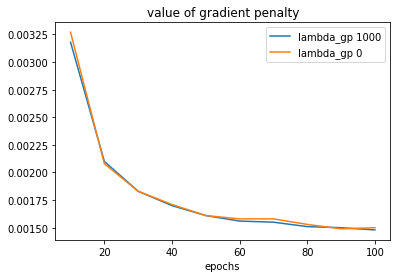

In [14]:
epochs = [10*i for i in range(1,11)]
plt.plot(epochs, gp_lambda1000, label = 'lambda_gp 1000')
plt.plot(epochs, gp_lambda0, label = 'lambda_gp 0')
plt.title('value of gradient penalty')
plt.xlabel('epochs')
plt.legend()
plt.show()

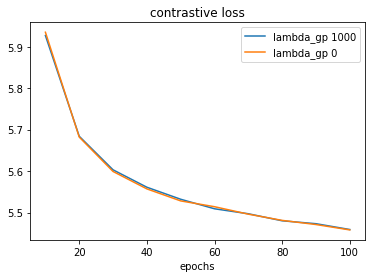

In [15]:
plt.plot(epochs, loss_lambda1000, label = 'lambda_gp 1000')
plt.plot(epochs, loss_lambda0, label = 'lambda_gp 0')
plt.title('contrastive loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

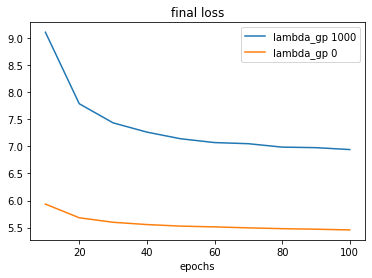

In [16]:
plt.plot(epochs, final_loss_lambda1000, label = 'lambda_gp 1000')
plt.plot(epochs, final_loss_lambda0, label = 'lambda_gp 0')
plt.title('final loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

# Result

We have that both lambda_gp = 0, 1000 give the same value of gradient penalty and contrastive loss. There is two possible cases <br>
1) If my code is correct, this means that adding the gradient penalty to the loss does not help the encoder with learning <br>
2) My code is incorrect, somehow final_loss.backward() give the same gradient as loss.backward() so the opitmizer give the same parameter update and therefore the same result!?